<a href="https://colab.research.google.com/github/soyeonkimgithub/AWA/blob/main/Movement_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural networks for regression problem

## import packages



In [ ]:
!pip install -U pandas-datareader
!pip install -U yfinance  #python3 -m pip install yfinance   
!pip install -U yahoo_fin
!pip install -U plotly==5.7.0
!pip install -U skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 28.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 6.4 MB 51.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import pandas_datareader as pdr
pdr.__version__

'0.10.0'

In [ ]:
import yfinance as yf
yf.__version__

'0.1.70'

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from scipy import stats
import matplotlib.pyplot as plt
import math

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,8)

## Load data

In [ ]:
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
# yfinance ref. https://algotrading101.com/learn/yahoo-finance-api-guide/
sp_list = si.tickers_sp500()
sp_one = [s for s in sp_list if s.__contains__("AM")]
sp_one

['AKAM', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'EPAM']

In [ ]:
# AAAAX (DWS RREEF Real Assets Fund - Class A (AAAAX)) 
# EZTGX (Eaton Vance Tax-Managed Growth 1.2 Fund Class C)

baseFund = "AAAAX"
targetFund = "EZTGX"

In [ ]:
base_df = get_data(baseFund, start_date="01/01/2009", end_date="25/05/2022", index_as_date = True, interval="1d")
base_df

,open,high,low,close,adjclose,volume,ticker
2009-01-02,7.07,7.07,7.07,7.07,5.384494,0,AAAAX
2009-01-05,7.04,7.04,7.04,7.04,5.361647,0,AAAAX
2009-01-06,7.13,7.13,7.13,7.13,5.430190,0,AAAAX
2009-01-07,7.02,7.02,7.02,7.02,5.346414,0,AAAAX
2009-01-08,7.03,7.03,7.03,7.03,5.354031,0,AAAAX
...,...,...,...,...,...,...,...
2022-05-18,12.81,12.81,12.81,12.81,12.810000,0,AAAAX
2022-05-19,12.87,12.87,12.87,12.87,12.870000,0,AAAAX
2022-05-20,12.91,12.91,12.91,12.91,12.910000,0,AAAAX
2022-05-23,13.07,13.07,13.07,13.07,13.070000,0,AAAAX


In [ ]:
df_fund = pd.DataFrame()
df_fund['open'] = base_df['open']
df_fund['high'] = base_df['high']
df_fund['low'] = base_df['low']
df_fund['close'] = base_df['close']
df_fund['adjclose'] = base_df['adjclose']

calculate moving average to set base line

In [ ]:
df_fund["EWM"] = df_fund['close'].ewm(span=12).mean() 

In [ ]:
df_fund.head(10)

,open,high,low,close,adjclose,EWM
2009-01-02,7.07,7.07,7.07,7.07,5.384494,7.070000
2009-01-05,7.04,7.04,7.04,7.04,5.361647,7.053750
2009-01-06,7.13,7.13,7.13,7.13,5.430190,7.083510
2009-01-07,7.02,7.02,7.02,7.02,5.346414,7.063463
2009-01-08,7.03,7.03,7.03,7.03,5.354031,7.054371
2009-01-09,6.98,6.98,6.98,6.98,5.315950,7.036295
2009-01-12,6.85,6.85,6.85,6.85,5.216942,6.994724
2009-01-13,6.85,6.85,6.85,6.85,5.216942,6.964522
2009-01-14,6.72,6.72,6.72,6.72,5.117935,6.916147
2009-01-15,6.74,6.74,6.74,6.74,5.133166,6.882767


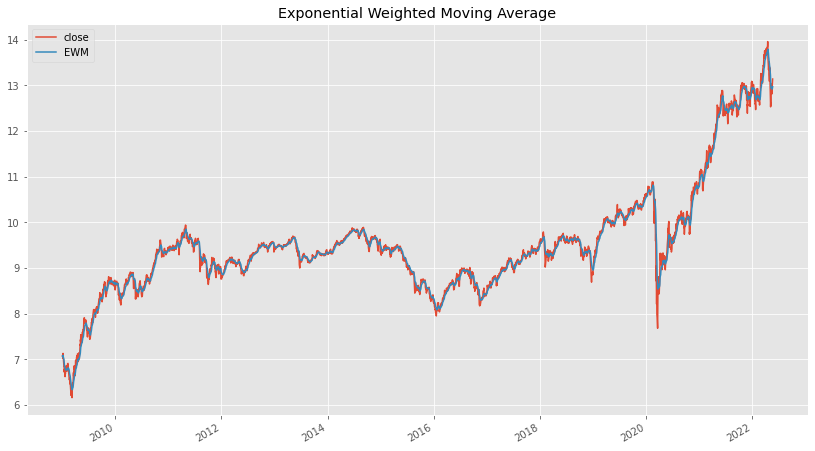

In [ ]:
df_fund[['close', "EWM"]].plot(figsize=(14, 8), title="Exponential Weighted Moving Average")

## Feature selection

/usr/local/lib/python3.7/dist-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


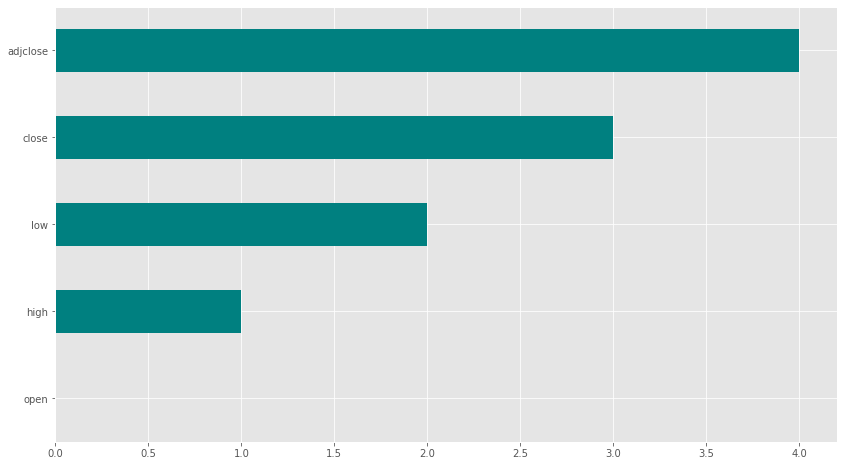

CPU times: user 1min 31s, sys: 455 ms, total: 1min 32s
Wall time: 1min 36s


In [ ]:
%%time
from skfeature.function.similarity_based import fisher_score

X = df_fund[['open','high','low','close','adjclose']]
X = X.to_numpy()
y = df_fund['EWM']
y = y.to_numpy()

ranks = fisher_score.fisher_score(X, y)

feat_importances = pd.Series(ranks, df_fund.columns[0:len(df_fund.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
feature_names = ['high', 'low', 'adjclose']

In [ ]:
X = df_fund[feature_names]
y = df_fund['EWM']

## Training/Validation split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2697, 3), (675, 3), (2697,), (675,))

In [ ]:
X_train

,high,low,adjclose
2019-02-06,9.66,9.66,9.128160
2010-03-12,8.67,8.67,6.843181
2021-05-19,12.30,12.30,12.008353
2010-11-03,9.47,9.47,7.536334
2011-01-14,9.45,9.45,7.553221
...,...,...,...
2020-01-27,10.65,10.65,10.252001
2013-05-14,9.67,9.67,8.208802
2020-06-12,9.56,9.56,9.202737
2021-09-28,12.41,12.41,12.259224


## Model - Neural network

In [ ]:
def build_and_compile_model():
  model = keras.Sequential()                                          # define a sequential model
  model.add(layers.Dense(128, input_shape=(3,), activation='relu'))   # input layer
  model.add(layers.Dense(256, activation='relu'))                     # hidden layer
  model.add(layers.Dense(256, activation='relu'))                     # use 'relu' as the activation function
  model.add(layers.Dense(1, activation='linear'))                     # output layer
  
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  return model

In [ ]:
dnn_model = build_and_compile_model()

In [ ]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 99,585
Trainable params: 99,585
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
%%time
history = dnn_model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
68/68 [==============================] - 4s 6ms/step - loss: 0.8200 - mean_absolute_error: 0.8200 - val_loss: 0.1690 - val_mean_absolute_error: 0.1690
Epoch 2/100
68/68 [==============================] - 0s 7ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - val_loss: 0.1052 - val_mean_absolute_error: 0.1052
Epoch 3/100
68/68 [==============================] - 0s 7ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - val_loss: 0.1100 - val_mean_absolute_error: 0.1100
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - val_loss: 0.0631 - val_mean_absolute_error: 0.0631
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - val_loss: 0.3187 - val_mean_absolute_error: 0.3187
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - val_loss: 0.2558 - val_mean_absolute_error: 0.2558
Epoch 7/100
68/68 [===

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


## Model - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

## Model validation

In [ ]:
from sklearn.metrics import mean_absolute_error

dnn_preds = dnn_model.predict(X_test)
print('Neural Network validation MAE:', mean_absolute_error(y_test, dnn_preds))

linear_preds = linear_model.predict(X_test)
print('Linear Regression validation MAE:', mean_absolute_error(y_test , linear_preds))

# Mean Absolute Error : difference between the measured value and "true" value
# 0.0794762759722812 vs 0.06697325185985221

Neural Network validation MAE: 0.06884839231917061
Linear Regression validation MAE: 0.07021655836445327


predict

In [ ]:
newFund = get_data(targetFund, start_date="01/01/2009", end_date="25/05/2022", index_as_date = True, interval="1d")

In [ ]:
df = pd.DataFrame()
df['open'] = newFund['open']
df['high'] = newFund['high']
df['low'] = newFund['low']
df['close'] = newFund['close']
df['adjclose'] = newFund['adjclose']
df["moving_average"] = df['close'].ewm(span=12).mean()

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')
df["predict_moving_average"] = reloaded.predict(df[feature_names]) 
df.head()

,open,high,low,close,adjclose,moving_average,predict_moving_average
2009-01-02,8.01,8.01,8.01,8.01,7.822392,8.010000,8.023860
2009-01-05,7.99,7.99,7.99,7.99,7.802861,7.999167,8.004193
2009-01-06,8.03,8.03,8.03,8.03,7.841924,8.011201,8.043526
2009-01-07,7.81,7.81,7.81,7.81,7.627077,7.947690,7.827199
2009-01-08,7.85,7.85,7.85,7.85,7.666140,7.921148,7.866531


In [ ]:
df_plot = pd.DataFrame()
df_plot = df

ci95_hi = []
ci95_lo = []
i = 0
for index, row in df_plot.iterrows():
    m = df_plot.iloc[0:i]['predict_moving_average'].mean()
    c = df_plot.iloc[0:i]['predict_moving_average'].count()
    s = df_plot.iloc[0:i]['predict_moving_average'].std()
    v = df_plot['predict_moving_average'].iloc[i]
    if(c==0) :
        c=1
    ci95_hi.append(v  + (0.05*v))
    ci95_lo.append(v  - (0.05*v))
    #ci95_hi.append(m + 1.96*s/math.sqrt(c))
    #ci95_lo.append(m - 1.96*s/math.sqrt(c))
    i = i + 1
    
df_plot['upper'] = ci95_hi
df_plot['lower'] = ci95_lo
df_plot = df_plot.reset_index()

In [ ]:
%%time
import plotly.graph_objs as go
fig = go.Figure([
    go.Scatter(
        name='Predict Moving Average',
        x=df_plot['index'],
        y=df_plot['predict_moving_average'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=df_plot['index'],
        y=df_plot['upper'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df_plot['index'],
        y=df_plot['lower'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
    go.Scatter(
        name='Moving Average',
        x=df_plot['index'],
        y=df_plot['moving_average'],
        mode='lines',
        line=dict(color='rgb(0, 176, 246)'),
math

err_date = pd.to_numeric(df_plot[(df_plot.lower > df_plot.moving_average) | (df_plot.upper < df_plot.moving_average)].index)
for ed in err_date:
    fig.add_vline(x=df_plot.iloc[ed]['index'], line_width=1, line_dash=None, line_color='rgb(255,0,0)')

fig.update_layout(
    yaxis_title='moving average',
    title='predict vs actual moving average',
    hovermode="x"
)
fig.show()

CPU times: user 2.21 s, sys: 29.7 ms, total: 2.24 s
Wall time: 2.24 s
